In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [12]:
# Import data
df = pd.read_csv("fcc-forum-pageviews.csv",parse_dates = [0], index_col = [0])
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [53]:
# Clean data
df2 = df.copy()
quantile_up = df2.quantile(.975,axis = 0)
quantile_low = df2.quantile(.025,axis = 0)
mask = (df['value'] <= quantile_up['value']) & (df['value'] >= quantile_low['value'])
df3 = df2[mask]
df3

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


Text(0.5, 1.0, 'DailyfreeCodeCamp Forum Page Views 5/2016-12/2019')

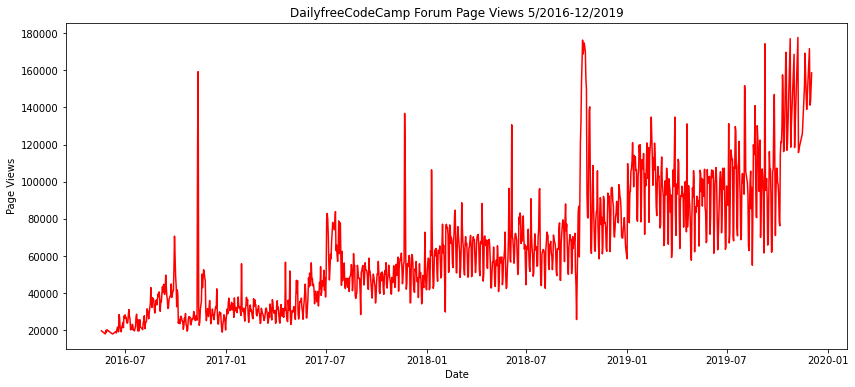

In [58]:
fig, ax = plt.subplots(figsize=(14,6))
plt.plot(df3,'r')
plt.ylabel('Page Views')
plt.xlabel('Date')
plt.title('DailyfreeCodeCamp Forum Page Views 5/2016-12/2019')


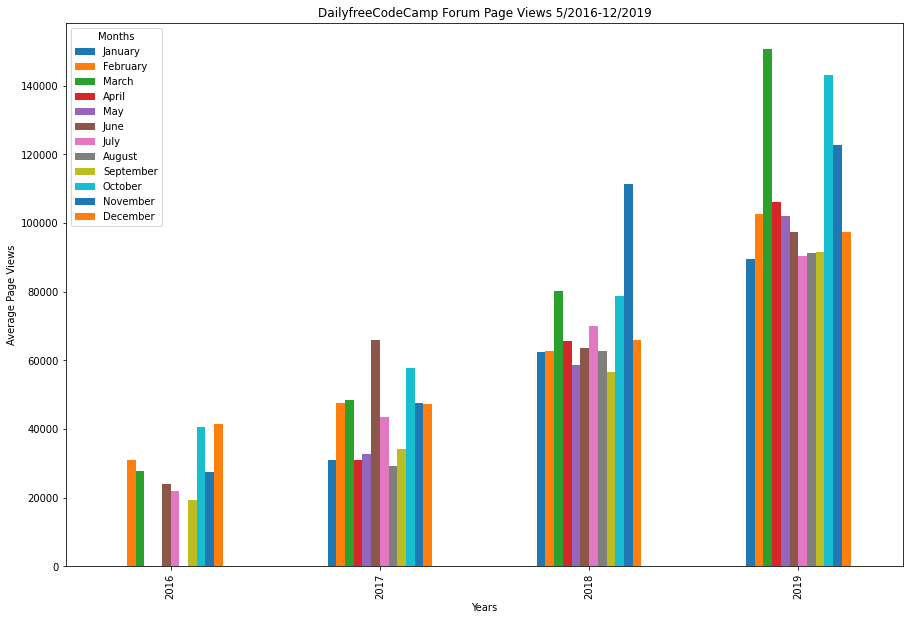

In [121]:
df4 = df3.copy()
df4['year'] = df4.index.year
df4['month'] = df4.index.month_name(locale = 'English')

df5 = df4.groupby(['year', 'month'])['value'].mean()
df5 = df5.unstack()

month_names=['January', 'February', 'March', 'April', 'May', 'June', 'July', 
             'August', 'September', 'October', 'November', 'December']
# Draw bar plot
fig = df5.plot(kind= 'bar', figsize = (15,10)).figure

plt.title('DailyfreeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.legend(title= 'Months', labels = month_names)



Text(0, 0.5, 'Page Views')

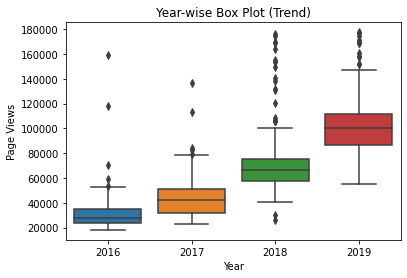

In [122]:
df6 = df3.copy()
df6['year'] = df6.index.year
df6['month'] = df6.index.month_name(locale = 'English')
myBox = sns.boxplot(x = 'year', y = 'value', data = df6)
myBox.set_title("Year Box Plot (Trend)")
myBox.set_xlabel('Year')
myBox.set_ylabel('Page Views')

Text(0, 0.5, 'Page Views')

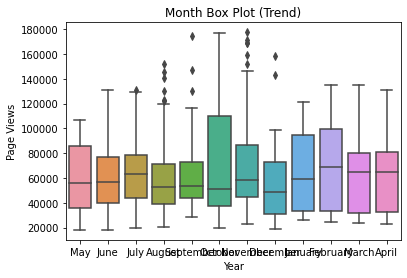

In [123]:
myBox2 = sns.boxplot(x = 'month', y = 'value', data = df6)
myBox2.set_title("Month Box Plot (Trend)")
myBox2.set_xlabel('Year')
myBox2.set_ylabel('Page Views')